**Loading Dataset**

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd
import matplotlib.pyplot as plt# data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/global-economic-indicators-dataset-2010-2023/economic_indicators_dataset_2010_2023.csv


In [2]:
df=pd.read_csv('/kaggle/input/global-economic-indicators-dataset-2010-2023/economic_indicators_dataset_2010_2023.csv')
df

,Date,Country,Inflation Rate (%),GDP Growth Rate (%),Unemployment Rate (%),Interest Rate (%),Stock Index Value
0,2010-01-31,Brazil,1.23,0.69,10.48,7.71,21748.85
1,2010-01-31,France,6.76,2.59,4.27,7.39,10039.56
2,2010-01-31,USA,7.46,4.84,2.64,6.39,13129.10
3,2010-02-28,Brazil,5.43,0.31,8.26,6.09,23304.58
4,2010-02-28,Canada,0.69,-0.52,11.92,-0.51,16413.03
...,...,...,...,...,...,...,...
495,2023-08-31,Japan,5.71,-3.85,4.69,8.50,5968.07
496,2023-08-31,UK,4.82,8.95,10.91,8.87,21731.52
497,2023-09-30,USA,7.32,0.61,9.36,4.58,38924.38
498,2023-10-31,Germany,8.04,-2.23,2.89,8.04,39107.07


In [3]:
df.columns

Index(['Date', 'Country', 'Inflation Rate (%)', 'GDP Growth Rate (%)',
       'Unemployment Rate (%)', 'Interest Rate (%)', 'Stock Index Value'],
      dtype='object')

Date: The specific date or year for which the economic data is recorded. This column helps track changes in economic indicators over time.

Country: The name of the country corresponding to the economic data. This column allows for comparisons between different countries' economic performances.

Inflation Rate (%): The percentage change in the general price level of goods and services over a specific period, indicating the rate at which prices are rising. High inflation can erode purchasing power.

GDP Growth Rate (%): The percentage increase in a country's Gross Domestic Product, representing the economic performance and growth over time. A positive GDP growth rate indicates a growing economy.

Unemployment Rate (%): The percentage of the labor force that is unemployed and actively seeking employment. This metric reflects the health of the labor market.

Interest Rate (%): The percentage charged on borrowed money or paid on savings, influencing economic activity, investment, and consumer spending.

Stock Index Value: A numerical value representing the performance of a selected group of stocks, which indicates the overall health of the stock market and investor sentiment in a country.

In [4]:
df.isnull().sum()

Date                     0
Country                  0
Inflation Rate (%)       0
GDP Growth Rate (%)      0
Unemployment Rate (%)    0
Interest Rate (%)        0
Stock Index Value        0
dtype: int64

In [5]:
df.duplicated().sum()

0

In [6]:
df.describe()

,Inflation Rate (%),GDP Growth Rate (%),Unemployment Rate (%),Interest Rate (%),Stock Index Value
count,500.00000,500.000000,500.000000,500.000000,500.000000
mean,5.08514,2.414780,6.906720,4.698180,20926.226540
std,2.95633,4.074762,2.982406,3.152877,11066.259233
min,0.00000,-5.000000,2.000000,-0.980000,1017.270000
25%,2.52500,-1.170000,4.257500,2.027500,11587.862500
50%,5.20500,2.580000,6.865000,4.975000,20996.210000
75%,7.71000,5.445000,9.502500,7.352500,30824.847500
max,9.99000,9.930000,11.970000,10.000000,39982.210000


In [7]:
df['Date'] = pd.to_datetime(df['Date'], errors='coerce')


In [8]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 7 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   Date                   500 non-null    datetime64[ns]
 1   Country                500 non-null    object        
 2   Inflation Rate (%)     500 non-null    float64       
 3   GDP Growth Rate (%)    500 non-null    float64       
 4   Unemployment Rate (%)  500 non-null    float64       
 5   Interest Rate (%)      500 non-null    float64       
 6   Stock Index Value      500 non-null    float64       
dtypes: datetime64[ns](1), float64(5), object(1)
memory usage: 27.5+ KB


**EDA Visualization and Comprasion**

**1. Which country has the highest and lowest inflation rates on average?**

In [9]:
highest_inflation = df.groupby('Country')['Inflation Rate (%)'].mean().idxmax()
lowest_inflation = df.groupby('Country')['Inflation Rate (%)'].mean().idxmin()

print(f"Highest average inflation rate: {highest_inflation}")
print(f"Lowest average inflation rate: {lowest_inflation}")


Highest average inflation rate: Japan
Lowest average inflation rate: Germany


**2.What is the trend of the unemployment rate over the years globally?**

In [10]:
global_unemployment = df.groupby('Date')['Unemployment Rate (%)'].mean()
global_unemployment.head(12)


Date
2010-01-31     5.796667
2010-02-28    10.516000
2010-03-31     3.705000
2010-04-30     9.170000
2010-05-31     8.023333
2010-06-30     5.475000
2010-07-31     7.620000
2010-08-31     7.332000
2010-09-30     6.750000
2010-10-31     7.670000
2010-11-30     4.680000
2010-12-31     5.360000
Name: Unemployment Rate (%), dtype: float64

**** 3.How does the average GDP growth rate differ across Country?****

In [11]:
if 'Country' in df.columns:
    average_gdp_region = df.groupby('Country')['GDP Growth Rate (%)'].mean()
    print(average_gdp_region)
else:
    print("Region column not found in dataset.")


Country
Australia    2.736078
Brazil       2.972500
Canada       1.179787
China        2.708537
France       2.016610
Germany      2.023902
India        2.241250
Japan        3.443889
UK           3.191522
USA          1.726667
Name: GDP Growth Rate (%), dtype: float64


**4.What are the average values of each economic indicator for different countries?**

                                   Date  Inflation Rate (%)  \
Country                                                       
Australia 2017-11-18 20:14:07.058823424            5.059020   
Brazil    2016-05-03 12:00:00.000000000            5.040417   
Canada    2016-07-01 00:00:00.000000000            4.986383   
China     2017-06-23 01:45:21.951219456            5.221220   
France    2017-02-04 10:10:10.169491456            4.912373   
Germany   2016-11-27 23:24:52.682926848            4.902439   
India     2017-11-10 20:08:34.285714176            4.949821   
Japan     2017-08-04 20:53:20.000000000            5.412222   
UK        2016-12-20 15:07:49.565217280            5.390217   
USA       2017-05-09 17:41:03.157894656            5.016842   

           GDP Growth Rate (%)  Unemployment Rate (%)  Interest Rate (%)  \
Country                                                                    
Australia             2.736078               7.121176           5.208824   
Brazil         

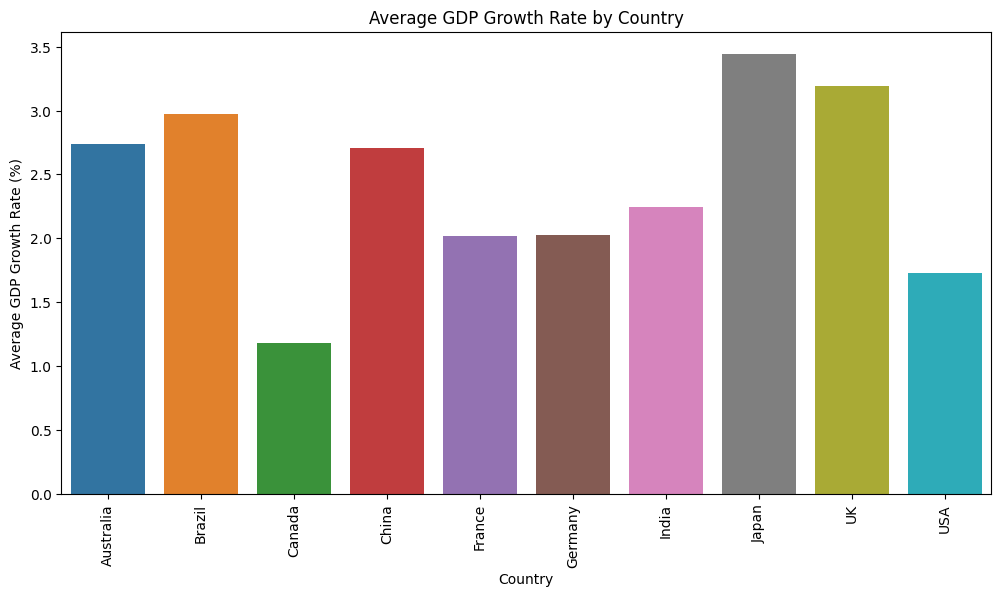

In [12]:
# Calculate the average values of each economic indicator by country
average_indicators = df.groupby('Country').mean()
print(average_indicators)
plt.figure(figsize=(12, 6))
sns.barplot(x=average_indicators.index, y='GDP Growth Rate (%)', data=average_indicators)
plt.xticks(rotation=90)
plt.title('Average GDP Growth Rate by Country')
plt.xlabel('Country')
plt.ylabel('Average GDP Growth Rate (%)')
plt.show()


**5.What is the trend of the unemployment rate over the years globally ?**

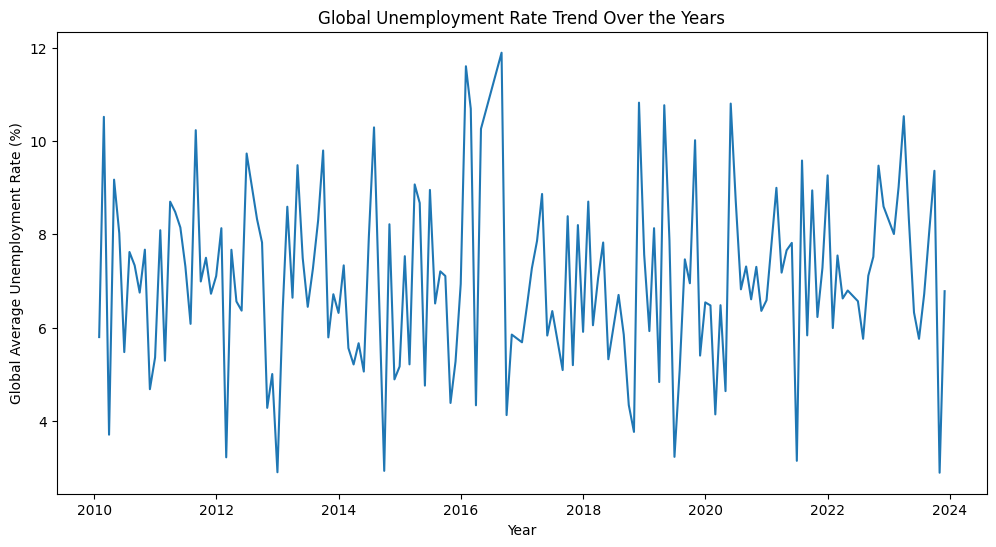

In [13]:
# Calculate global average unemployment rate over the years
global_unemployment = df.groupby('Date')['Unemployment Rate (%)'].mean()
plt.figure(figsize=(12, 6))
plt.plot(global_unemployment.index, global_unemployment)
plt.title('Global Unemployment Rate Trend Over the Years')
plt.xlabel('Year')
plt.ylabel('Global Average Unemployment Rate (%)')
plt.show()



**6.How does the average GDP growth rate differ across Countries ?**

Country
Australia    2.736078
Brazil       2.972500
Canada       1.179787
China        2.708537
France       2.016610
Germany      2.023902
India        2.241250
Japan        3.443889
UK           3.191522
USA          1.726667
Name: GDP Growth Rate (%), dtype: float64


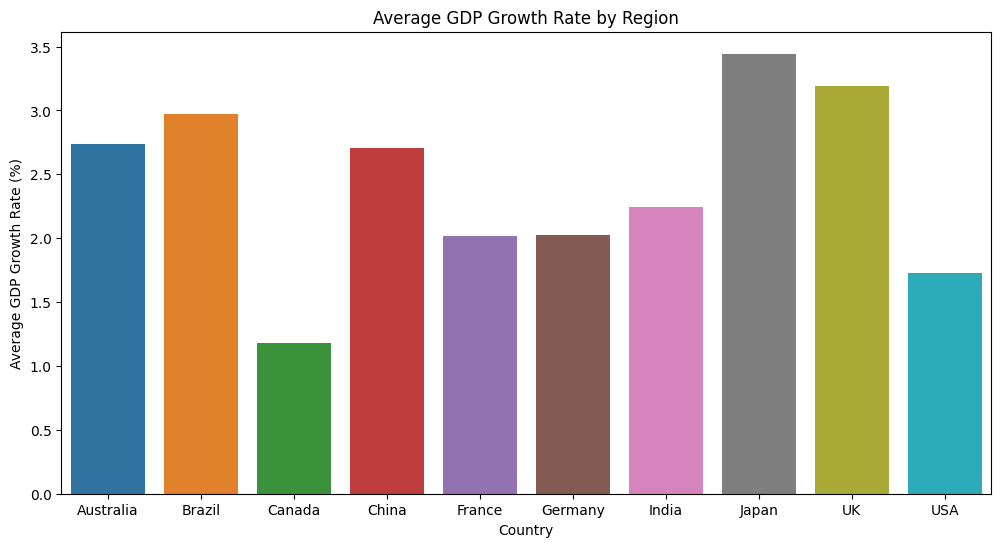

In [14]:

if 'Country' in df.columns:
    average_gdp_region = df.groupby('Country')['GDP Growth Rate (%)'].mean()
    print(average_gdp_region)
    plt.figure(figsize=(12, 6))
    sns.barplot(x=average_gdp_region.index, y=average_gdp_region.values)
    plt.title('Average GDP Growth Rate by Region')
    plt.xlabel('Country')
    plt.ylabel('Average GDP Growth Rate (%)')
    plt.show()
else:
    print("Region column not found in dataset.")


**7. What is the distribution of inflation rates across all countries?**

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


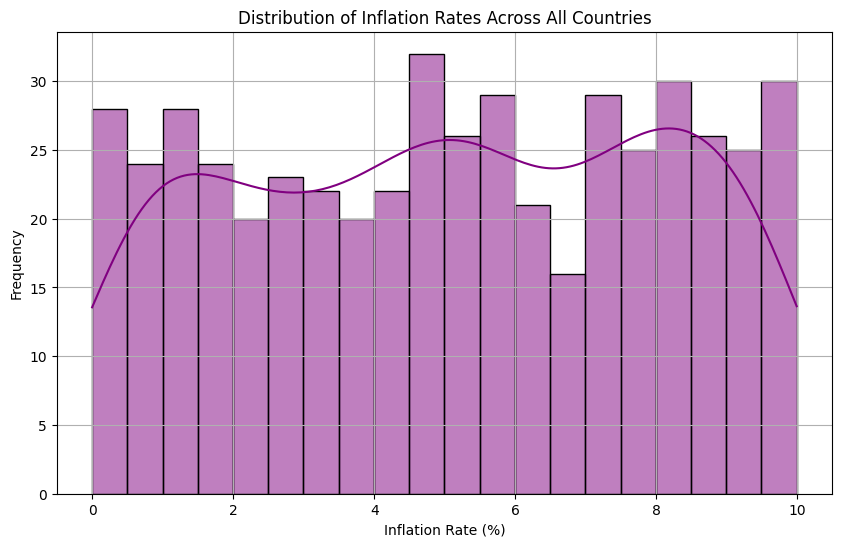

In [15]:
plt.figure(figsize=(10, 6))
sns.histplot(df['Inflation Rate (%)'], bins=20, kde=True, color='purple')
plt.title('Distribution of Inflation Rates Across All Countries')
plt.xlabel('Inflation Rate (%)')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()


**7.Which countries have the highest and lowest stock index values on average?**

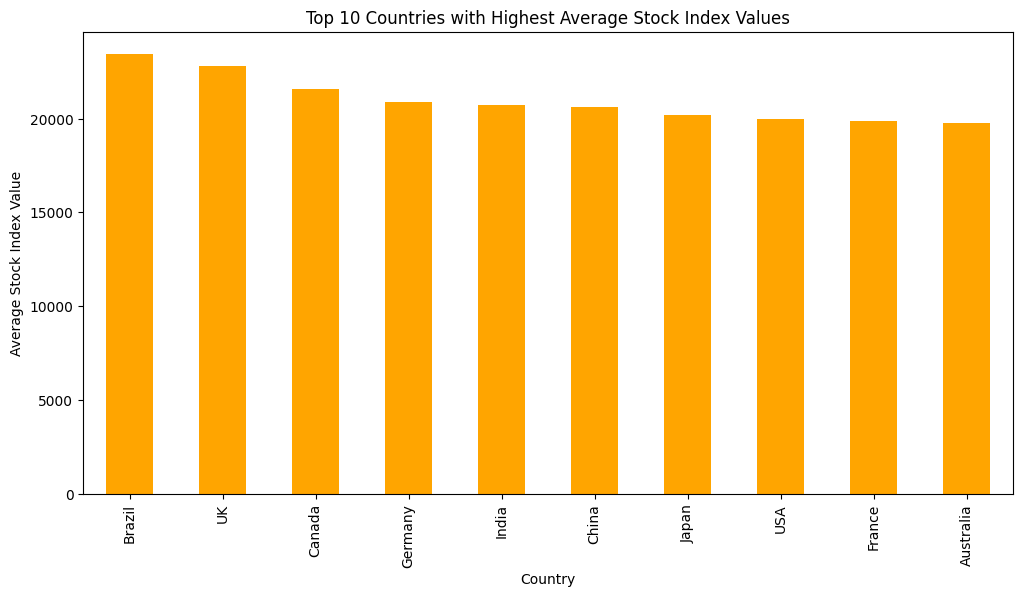

In [23]:
average_stock_index = df.groupby('Country')['Stock Index Value'].mean().sort_values(ascending=False)
plt.figure(figsize=(12, 6))
average_stock_index.head(10).plot(kind='bar', color='orange')
plt.title('Top 10 Countries with Highest Average Stock Index Values')
plt.xlabel('Country')
plt.ylabel('Average Stock Index Value')
plt.show()


**Conclusion**

The economic indicator dataset provides valuable insights into the global economic landscape over time. Countries exhibit diverse economic profiles, with significant variations in inflation, GDP growth, and unemployment rates. While some countries maintain stable economic conditions, others show volatility in key metrics, highlighting economic challenges. Inflation rates tend to negatively correlate with GDP growth, indicating that higher inflation often accompanies slower economic growth. Additionally, the stock index values reflect investor confidence and are influenced by these economic indicators. Understanding these trends is crucial for making informed decisions related to economic policy and investments.

**Suggestions**

To develop a country in terms of inflation rate, GDP growth rate, unemployment rate, interest rate, and stock index value, a comprehensive strategy is essential. The central bank should manage monetary policy effectively to control inflation and maintain stable interest rates, while the government should focus on fiscal discipline and targeted public investment to stimulate GDP growth. Job creation can be enhanced through investment in infrastructure, education, and skill development programs that align with market needs, reducing unemployment. Promoting a robust financial sector, ensuring transparent corporate governance, and encouraging domestic and foreign investments can strengthen stock market performance. A balanced approach, integrating these economic policies, will foster sustainable development, economic stability, and resilience against